<a href="https://colab.research.google.com/github/syhamham/AWA-Project/blob/main/pressure2_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 차압 - 실증존 DP Pre

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_excel('pre-data.xlsx')
df.head()

ds           y
0 2023-09-25 09:54:00  153.000000
1 2023-09-25 09:55:00  157.000000
2 2023-09-25 09:56:00  156.666667
3 2023-09-25 09:57:00  170.666667
4 2023-09-25 09:58:00  174.333333

In [3]:
df.tail()

ds     y
38677 2023-10-23 11:36:00  56.0
38678 2023-10-23 11:37:00  56.0
38679 2023-10-23 11:38:00  64.5
38680 2023-10-23 11:39:00  66.0
38681 2023-10-23 11:40:00  60.5

In [4]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbkwhjyxd/u1_tl1_2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbkwhjyxd/3423d5fo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25581', 'data', 'file=/tmp/tmpbkwhjyxd/u1_tl1_2.json', 'init=/tmp/tmpbkwhjyxd/3423d5fo.json', 'output', 'file=/tmp/tmpbkwhjyxd/prophet_modelm5oodn3k/prophet_model-20240514073124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=60, freq='1min')
future.tail(60)

ds
38682 2023-10-23 11:41:00
38683 2023-10-23 11:42:00
38684 2023-10-23 11:43:00
38685 2023-10-23 11:44:00
38686 2023-10-23 11:45:00
38687 2023-10-23 11:46:00
38688 2023-10-23 11:47:00
38689 2023-10-23 11:48:00
38690 2023-10-23 11:49:00
38691 2023-10-23 11:50:00
38692 2023-10-23 11:51:00
38693 2023-10-23 11:52:00
38694 2023-10-23 11:53:00
38695 2023-10-23 11:54:00
38696 2023-10-23 11:55:00
38697 2023-10-23 11:56:00
38698 2023-10-23 11:57:00
38699 2023-10-23 11:58:00
38700 2023-10-23 11:59:00
38701 2023-10-23 12:00:00
38702 2023-10-23 12:01:00
38703 2023-10-23 12:02:00
38704 2023-10-23 12:03:00
38705 2023-10-23 12:04:00
38706 2023-10-23 12:05:00
38707 2023-10-23 12:06:00
38708 2023-10-23 12:07:00
38709 2023-10-23 12:08:00
38710 2023-10-23 12:09:00
38711 2023-10-23 12:10:00
38712 2023-10-23 12:11:00
38713 2023-10-23 12:12:00
38714 2023-10-23 12:13:00
38715 2023-10-23 12:14:00
38716 2023-10-23 12:15:00
38717 2023-10-23 12:16:00
38718 2023-10-23 12:17:00
38719 2023-10-23 12:18:00
38720 2023-10-23 12:19:00
38721 2023-10-23 12:20:00
38722 2023-10-23 12:21:00
38723 2023-10-23 12:22:00
38724 2023-10-23 12:23:00
38725 2023-10-23 12:24:00
38726 2023-10-23 12:25:00
38727 2023-10-23 12:26:00
38728 2023-10-23 12:27:00
38729 2023-10-23 12:28:00
38730 2023-10-23 12:29:00
38731 2023-10-23 12:30:00
38732 2023-10-23 12:31:00
38733 2023-10-23 12:32:00
38734 2023-10-23 12:33:00
38735 2023-10-23 12:34:00
38736 2023-10-23 12:35:00
38737 2023-10-23 12:36:00
38738 2023-10-23 12:37:00
38739 2023-10-23 12:38:00
38740 2023-10-23 12:39:00
38741 2023-10-23 12:40:00

In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
38737 2023-10-23 12:36:00  57.093101   45.137036   69.170910
38738 2023-10-23 12:37:00  57.081090   45.178932   69.057073
38739 2023-10-23 12:38:00  57.068887   43.789991   68.256604
38740 2023-10-23 12:39:00  57.056493   45.114719   69.023475
38741 2023-10-23 12:40:00  57.043910   45.481651   69.429103

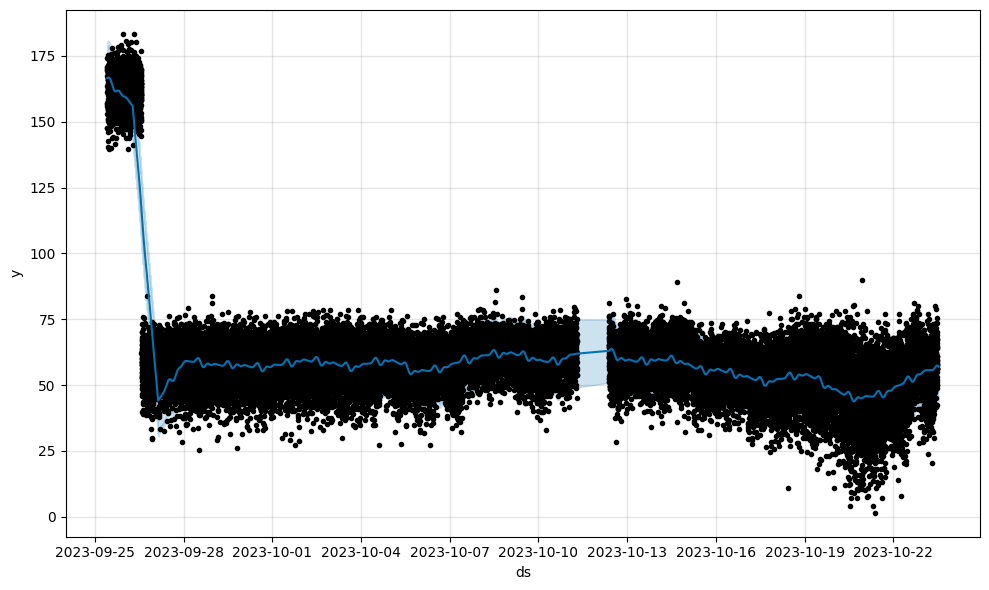

In [7]:
fig1 = m.plot(forecast)
fig1.show()

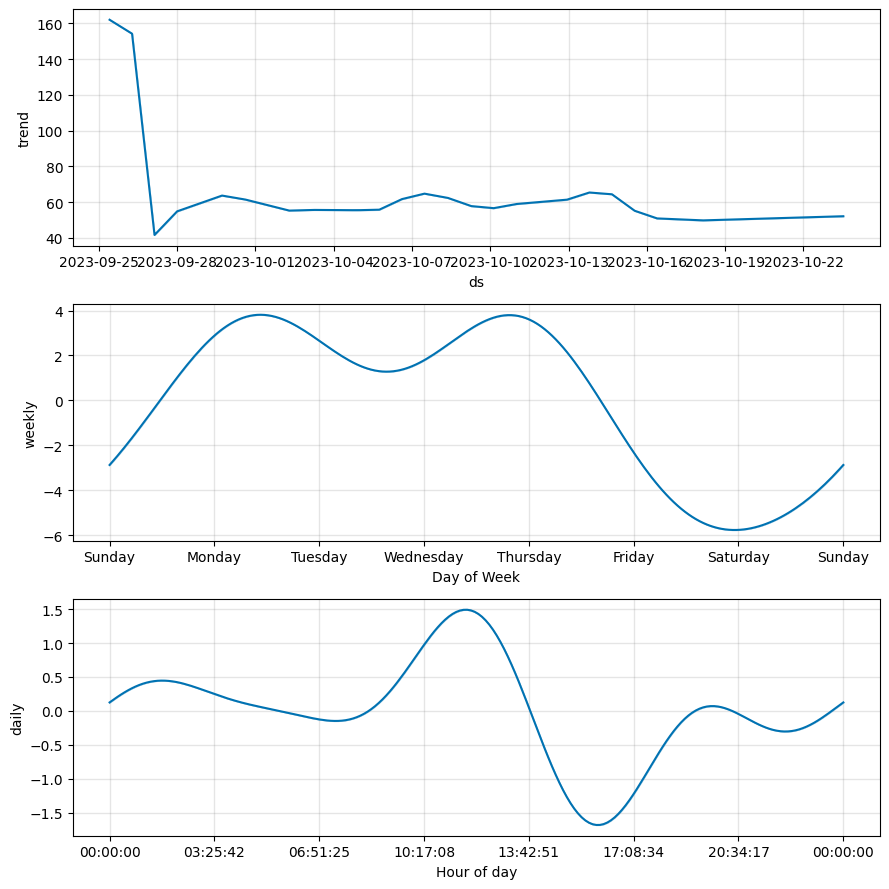

In [8]:
fig2 = m.plot_components(forecast)
fig2.show()

In [9]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [10]:
plot_components_plotly(m, forecast)